In [1]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

labels =pd.DataFrame(iris.target)
# labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length', 'Sepal width', 'Petal length','Petal width']
data['label']=labels

In [20]:
feature = data[['Sepal length', 'Sepal width']]
feature

,Sepal length,Sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

model = KMeans(n_clusters=3)
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']

r = pd.concat([feature, predict], axis=1)
r.tail()

,Sepal length,Sepal width,predict
145,6.7,3.0,1
146,6.3,2.5,2
147,6.5,3.0,1
148,6.2,3.4,1
149,5.9,3.0,2


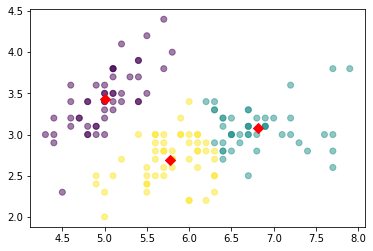

In [22]:
centers = pd.DataFrame(model.cluster_centers_,
                       columns=['Sepal length', 'Sepal width'])
# scatter plot
plt.scatter(r['Sepal length'], r['Sepal width'], c=r['predict'],
           alpha=0.5)
plt.scatter(centers['Sepal length'], centers['Sepal width'], s=50, marker='D',
           c='r')
plt.show()

In [39]:
# 빈도수 출력
ct = pd.crosstab(data['label'], r['predict']) # 빈도표
ct

predict,0,1,2
label,,,
0,50,0,0
1,0,12,38
2,0,35,15


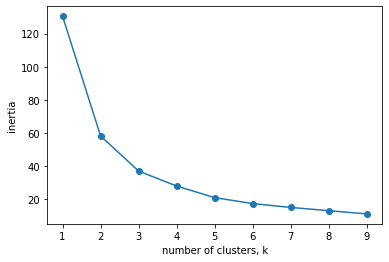

In [40]:
# 클러스터의 개수 조사 (Inertia value 사용)
# Inertia value -> 군집화 된 다음, 중심점에서 군집된 데이터간의 거리 합 -> 응집도
# inertia_ -> 숫자가 낮을수록 응집도가 높다
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(feature)
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()